In [1]:
import numpy as np

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import glob
import pathlib

import PIL
import PIL.Image

import tensorflow as tf
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt


2024-08-19 12:50:47.854217: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-19 12:50:47.925029: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-19 12:50:47.943653: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
os.chdir('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/src/app')

In [3]:
from model_cnn import *


In [4]:
get_version()

TensorFlow version: 2.17.0
Num GPUs Available:  1


I0000 00:00:1724064650.737169    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724064650.878259    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724064650.878328    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [5]:
folder = pathlib.Path('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/data/segmented_images/')

In [6]:
files_count(folder)

10015 total images found.
7 labels:
      mel
      nv
      df
      akiec
      bkl
      vasc
      bcc


In [7]:
params = Parameters(32, 450, 600)

In [8]:
train_ds, test_ds = train_test_split(folder, params)

Found 10015 files belonging to 7 classes.
Using 8012 files for training.


I0000 00:00:1724064651.260522    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724064651.260742    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724064651.260788    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724064651.413599    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1724064651.413677    1250 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 10015 files belonging to 7 classes.
Using 2003 files for validation.


In [9]:
labels = get_labels(folder)


There are 7 labels.
['mel', 'nv', 'df', 'akiec', 'bkl', 'vasc', 'bcc']


In [10]:
model = create_and_compile(classes=labels)

In [11]:
# Function to one-hot encode the labels
def one_hot_encode_labels(image, label):
    return image, tf.one_hot(label, 7)

In [12]:
train_ds = train_ds.map(one_hot_encode_labels)
test_ds = test_ds.map(one_hot_encode_labels)

In [13]:
history = train_model(model, train_ds, test_ds)

Epoch 1/100


I0000 00:00:1724064656.344812    2067 service.cc:146] XLA service 0x7f868c017670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724064656.344947    2067 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-08-19 12:51:17.215466: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,224,299]{3,2,1,0}, f32[32,64,222,297]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-08-19 12:51:17.658055: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.442724537

251/251 ━━━━━━━━━━━━━━━━━━━━ 113s 334ms/step - auc: 0.5479 - loss: 10.1010 - val_auc: 0.5650 - val_loss: 9.2286 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 239ms/step - auc: 0.6524 - loss: 5.8751 - val_auc: 0.7657 - val_loss: 3.8106 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - auc: 0.6839 - loss: 3.2677 - val_auc: 0.7760 - val_loss: 3.2013 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 235ms/step - auc: 0.7145 - loss: 3.0865 - val_auc: 0.7026 - val_loss: 3.7671 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 59s 234ms/step - auc: 0.7317 - loss: 3.1428 - val_auc: 0.7448 - val_loss: 3.0247 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 238ms/step - auc: 0.7580 - loss: 2.3155 - val_auc: 0.7873 - val_loss: 2.1858 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 60s 240ms/step - auc: 0.7701 - loss: 1.9131 - val_auc: 0.8321 - val_loss: 2.0494 - learning_r

In [14]:
model_sumary(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 450, 600, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 448, 598, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 448, 598, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 224, 299, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 299, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 297, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 222, 297, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 111, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 146, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 109, 146, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 54, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 504576)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    32,292,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,168,023 (370.67 MB)

 Trainable params: 32,389,127 (123.55 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 64,778,256 (247.11 MB)

None


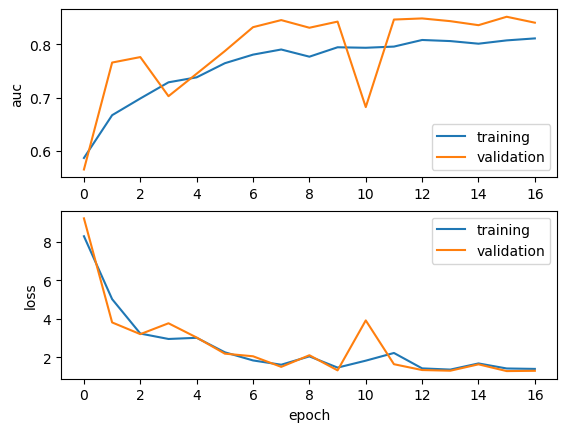

In [15]:
plot_trainig(history)

In [16]:
model.save('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/models/CNN_97_diagnosis_segmented.keras')